# **Lab 4: Integration**
**Martin Börjeson**

# **Abstract**

In this lab I've implemented quadratures for approximating integrals of functions over the reference interval and reference triangle. It was a fairly straightforward week.

#**About the code**

The code is written by me, Martin Börjeson.

In [48]:
"""DD2363 Methods in Scientific Computing, """
"""KTH Royal Institute of Technology, Stockholm, Sweden."""

# This file is part of the course DD2365 Advanced Computation in Fluid Mechanics
# KTH Royal Institute of Technology, Stockholm, Sweden
#
# Report by Martin Börjeson

'KTH Royal Institute of Technology, Stockholm, Sweden.'

# **Set up environment**

To have access to the neccessary modules you have to run this cell. If you need additional modules, this is where you add them. 

In [49]:
# Load neccessary modules.
import numpy as np

from matplotlib import pyplot as plt

# **Introduction**

An integral is a continuation of doing a sum of the values at a function at different points. It has many applications, but calculating an integral exactly is not always possible or feasible. In such cases, an approximation will have to do.

In this report, I've implemented an algorithm to perform a selection of quadratures, both in one and two dimensions.

Stochastic Monte Carlo Quadratures were also implemented.

## **Method**

#2-point Gauss Quadrature

This map of the Gauss quadrature was in the problem assignment this week.

The idea is to apply a coordinate map $F: [0,1] -> [-1,1]$ on the function $f$, and integrate that in the span $[-1,1],$ for which the Gauss quadrature formula can be applied.

$F(x) = \frac{1+x}{2}$

$\int_{[0,1]}f(x)dx = \int_{[-1,1]}f(F(x))|F'|dx=\frac{1}{2}\int_{[-1,1]}f(F(x))dx = \frac{1}{2}(f(F(x_1))+f(F(x_2)))= \frac{f(\frac{3-\sqrt{3}}{6}) + f(\frac{3+\sqrt{3}}{6})}{2}$

Input: function $f(x)$

Output: quadrature approximation of integral $\int_0^1 f(x) dx$

In [50]:
def two_point_gauss_quad(f):
  return ( f((3-np.sqrt(3))/6) + f((3+np.sqrt(3))/6) )/2

# 3-point edge midpoint quadrature over a reference triangle

The weights for a 3-point edge midpoint quadrature over a reference triangle are all $\frac{1}{6}.$

Input: function $f(x_1,x_2)$

Output: Quadrature approximation of integral $\int_{triangle} f(x_1,x_2) = \int_0^1 ( \int_0^{1-x_2}f(x_1,x_2)dx_1 )dx_2$

In [51]:
def three_point_edge_midpoint_quad(f):
  return (f(0.5,0) + f(0,0.5) + f(0.5,0.5))/6

# Monte Carlo quadrature over a unit interval

The Monte Carlo quadrature is a stochastic process which approximates the integeal of a function through a sum of 1-point quadratures evaluated at randomly selected points.

$\int_D g(x)dx \approx \frac{|D|}{n} \sum_{i=1}^n g(x_i)$

Where the values in X are sampled from a uniform distribution over the domain $D.$

The convergence of the approximation is slow compared to many other approximations, but is unaffected by the dimensions of the domain.

In the case of integrating over the unit interval $[0,1],$ the equation can be simplified to $\int_0^1 g(x)dx \approx \frac{1}{n} \sum_{i=1}^n g(x_i)$

Input: function $f(x)$

Output: Monte Carlo quadrature approximation of integral over unit interval $\int_0^1f(x)dx$

In [52]:
def monte_carlo_quad(f, n = 10000):
  sum = 0
  for x in np.random.rand(n):
    sum += f(x)
  return sum/n

#Bonus assignment: Monte Carlo quadrature over a reference triangle

Doing Monte Carlo over a 2-dimensional domain is fairly straightforward, but you need to make sure that the points really are sampled uniformly. This is very easy to achieve for rectangles, as the X and Y coordinates are linearly independent. Unfortunantely, a triangle is not a rectangle.

One easy approach is to uniformly select points in a reference square, and ignore all points where $x+y>1.$ An objectively better approach is to map all points in a reference square to the reference triangle in a way that produces a uniform distribution.

A simple map $F$ is $F(x_1,x_2) = (x_1,x_2)$ if $x_1+x_2 \le 1$ and $(1-x_1,1-x_2)$ if $x_1+x_2 > 1,$ which is equivalent to a reflection on the points above the $x_1=x_2$ line.



Input: function $f(x_1,x_2)$

Output: Monte Carlo quadrature approximation of function integral over unit triangle

In [53]:
def tr_map(x1,x2):
  if(x1+x2 <= 1):
    return x1,x2
  else:
    return 1-x1,1-x2

def monte_carlo_triangle_quad(f,n = 10000):
  sum = 0
  for i in range(n):
    x1,x2 = tr_map(np.random.rand(),np.random.rand())
    sum += f(x1,x2)
  return sum/(n*2)

# **Results**

Below are a limited set of tests for the varies methods.

#2-point Gauss Quadrature

Test: Verify exact integration of cubic polynomials





In [54]:
def f1(x):
  return x**3+x**2+x+1

#Primitive function of f1
def F1(x):
  return (3*x**4+4*x**3+6*x**2+12*x)/12

print("Quad:",two_point_gauss_quad(f1))

print("Actual:",F1(1)-F1(0))

Quad: 2.083333333333333
Actual: 2.0833333333333335


The quadrature gives the same result as doing the integration by hand.

# 3-point edge midpoint quadrature over a reference triangle

Test: Convergence of residual

In [58]:
def f2(x1,x2):
  return x1**2-2*x2+2

#Primitive function of f2 evaluated from 0 to 1-x_2
def F2(x):
  return (-x**3+9*x**2-15*x+7)/3

print("Triangle quad:",three_point_edge_midpoint_quad(f2))
print("Actual:", two_point_gauss_quad(F2))

Triangle quad: 0.75
Actual: 0.7500000000000002


The quadrature gives the same result as doing the first integration by hand, and applying a 2-point Gauss Quadrature.

# Monte Carlo quadrature over a unit interval

Test: Convergence of residual

I used the average over 100 runs for each value of n to get the residual at each value of n, as the results would vary wildly for low values otherwise.

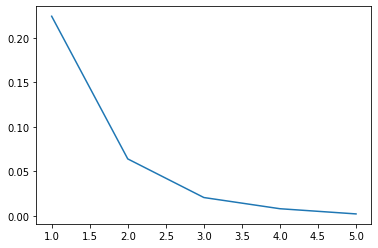

In [82]:
actual = F1(1) - F1(0)

results = []
x = []
for i in range(1,6):
  results.append(np.abs(actual - monte_carlo_quad(f1,10**i)))
  for j in range(99):
    results[-1] += np.abs(actual - monte_carlo_quad(f1,10**i))
  results[-1]/=100
  x.append(np.log10(10**i))
plt.plot(x,results)

The convergence seems to check out, I think.

#Bonus assignment: Monte Carlo quadrature over a reference triangle

Test: Convergence of residual

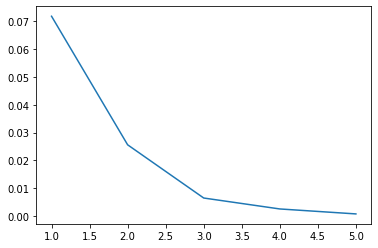

In [83]:
actual = two_point_gauss_quad(F2)
results = []
x = []

for i in range(1,6):
  results.append(np.abs(actual - monte_carlo_triangle_quad(f2,10**i)))
  for j in range(99):
    results[-1] += np.abs(actual - monte_carlo_triangle_quad(f2,10**i))
  results[-1]/=100
  x.append(np.log10(10**i))
plt.plot(x,results)

Again, the convergence seems to check out.

# **Discussion**

The assignments this week were fairly straightforward. The limited test results seem to confirm that the methods work as they should.

Most quadratures could be expressed with one or two lines of code, which meant that most of the work was in doing the theoretical legwork, rather than working out bugs in the program, which was a nice change from last week. 

It's obvious that these approximations can be applied in a lot of different situations. They are so simple to compute, yet can integrate pretty complex functions. It feels almost like magic!

It was also fun to experiment with different mapping functions to create a uniform distribution over different shapes.